<a href="https://colab.research.google.com/github/BlessMario/AI_Spectrum/blob/main/01_intro_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAS Machine Learning: Lecture 01

## 0 - Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1 - Loading the Dataset into a Pandas DataFrame

We first load the CSV Iris Dataset into a Pandas `DataFrame` object:

In [2]:
df_iris = sns.load_dataset('iris')

Next, we display the first 5 rows:

In [3]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


and then we also display the last 5 rows:

In [4]:
df_iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


We can also display the size of our dataset, which is in the form of a Pandas `DataFrame`:

In [5]:
df_iris.shape

(150, 5)

## 2 - Mapping Features into a NumPy Array

In the next code cell, we first select two features `petal_length` and `petal_width`and then access the underlying Numpy Array embedded in the DataFrame via the `.values` attribute.

In [6]:
X = df_iris[['petal_length', 'petal_width']].values
print(X.shape)
#print(X)

(150, 2)


We display the first 5 entries of the dataset:

In [7]:
X[:5, :]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

## 3 - Mapping Class Labels into a NumPy Array

As the class labels are in the form of `strings`, we need to map those values to a new `int` (integer) representation, in which each class label is then mapped to a unique single number. To do so, we add a new column named `class_label` to the data frame:

In [8]:
label_dict = {'setosa': 0,
              'versicolor': 1,
              'virginica': 2}

df_iris['class_label'] = df_iris['species'].map(label_dict)
df_iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,class_label
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,2


Then, similar as above, we reference the underlying NumPy array via the `.values` attribute and assign those values to a variable `y`:

In [9]:
y = df_iris['class_label'].values
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
y.shape
df_iris.info()
#indices = np.arrangy(200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   class_label   150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Next, we split the input dataset into a training and a test set. Notice that the dataset is ordered by class labels. We therefore new to shuffle the dataset.

**Q: Why is it important to shuffle the dataset?**



## 4 - Shuffling the Dataset and Generating Training and Test Subsets

We first create a variable named `indices`, which will later on be used to access the elements of the dataset.

In [11]:
indices = np.arange(y.shape[0])
indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

Next, we shuffle the index array and use a random seed so as to reproduce the results. 

**Q: why is it useful to have the same shuffle order?**

In [12]:
rnd = np.random.RandomState(123)
shuffled_indices = rnd.permutation(indices)
shuffled_indices

array([ 72, 112, 132,  88,  37, 138,  87,  42,   8,  90, 141,  33,  59,
       116, 135, 104,  36,  13,  63,  45,  28, 133,  24, 127,  46,  20,
        31, 121, 117,   4, 130, 119,  29,   0,  62,  93, 131,   5,  16,
        82,  60,  35, 143, 145, 142, 114, 136,  53,  19,  38, 110,  23,
         9,  86,  91,  89,  79, 101,  65, 115,  41, 124,  95,  21,  11,
       103,  74, 122, 118,  44,  51,  81, 149,  12, 129,  56,  50,  25,
       128, 146,  43,   1,  71,  54, 100,  14,   6,  80,  26,  70, 139,
        30, 108,  15,  18,  77,  22,  10,  58, 107,  75,  64,  69,   3,
        40,  76, 134,  34,  27,  94,  85,  97, 102,  52,  92,  99, 105,
         7,  48,  61, 120, 137, 125, 147,  39,  84,   2,  67,  55,  49,
        68, 140,  78, 144, 111,  32,  73,  47, 148, 113,  96,  57, 123,
       106,  83,  17,  98,  66, 126, 109])

We use then the shuffled indices so as to refer/access both the features `X` and `y` relative to each other.

**Q: Why do we need to maintain the correspondence between `X` and `y`?**

In [13]:
X_shuffled, y_shuffled = X[shuffled_indices], y[shuffled_indices]

Finally, we split the input dataset into training and test subsets:

In [14]:
idx_cutoff = 105
X_train, y_train = X[shuffled_indices][:idx_cutoff], y[shuffled_indices][:idx_cutoff]
X_test, y_test = X[shuffled_indices][idx_cutoff:], y[shuffled_indices][idx_cutoff:]

## 5 - Using Scikit-Learn

We can skip some of the previous steps by directly using some of the functionalities of the `scikit-learn` toolbox. In this case, we load the Iris dataset and split it into $30\%$ test data and $70\%$ training data:

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


df_iris = load_iris()

#print(df_iris.data)
#print(df_iris.target)
X, y = df_iris.data[:,2:], df_iris.target
#print(X.shape)
#print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True) 

In [16]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (105, 2)
y_train.shape: (105,)
X_test.shape: (45, 2)
y_test.shape: (45,)


## 6 - Visualizing the Dataset

In order to better understand the dataset in course, it is important to visualize it:

In [22]:
type(df_iris) # it ain't a pandas dataframe

sklearn.utils.Bunch

In [23]:
type(df_iris.data) # underneath numpy ndarray

numpy.ndarray

In [ ]:
df_iris.data

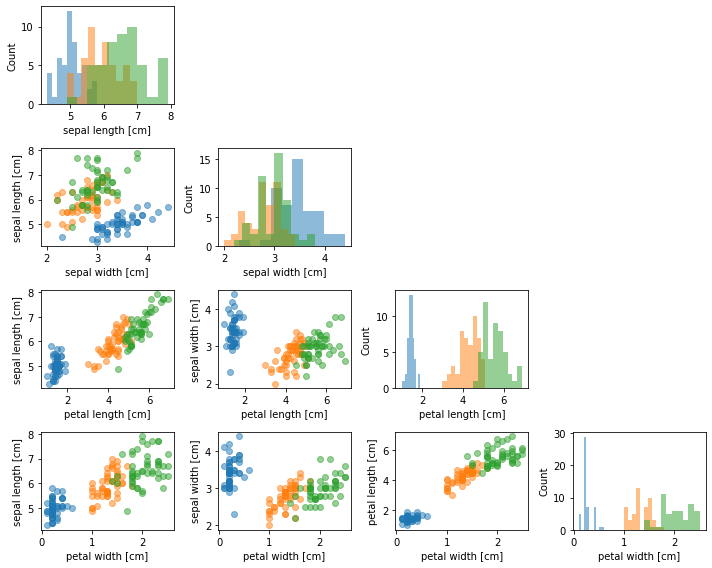

In [28]:
from mlxtend.plotting import scatterplotmatrix


names = ['sepal length [cm]', 'sepal width [cm]',
         'petal length [cm]', 'petal width [cm]']

fig, axes = scatterplotmatrix(df_iris.data[y==0], figsize=(10, 8), alpha=0.5)
fig, axes = scatterplotmatrix(df_iris.data[y==1], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(df_iris.data[y==2], fig_axes=(fig, axes), alpha=0.5, names=names)

plt.tight_layout()
plt.show()

Since we'll be using only $2$ features, namely the petal length and petal width (via `X, y = iris.data[:, 2:], iris.target`), we use the scatter plot matrix to plot only those $2$ features:

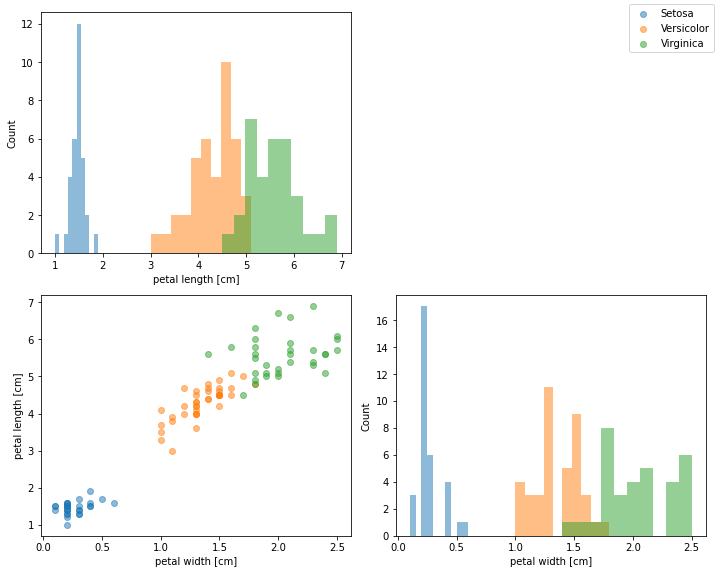

In [29]:
names = ['petal length [cm]', 'petal width [cm]']

fig, axes = scatterplotmatrix(X_train[y_train==0], figsize=(10, 8), alpha=0.5, label="Setosa")
fig, axes = scatterplotmatrix(X_train[y_train==1], fig_axes=(fig, axes), alpha=0.5, label="Versicolor")
fig, axes = scatterplotmatrix(X_train[y_train==2], fig_axes=(fig, axes), alpha=0.5, names=names, label="Virginica")

fig.legend()

plt.tight_layout()
plt.show()

Instead of using a scatterplot matrix, we can also use directly a scatter plot:

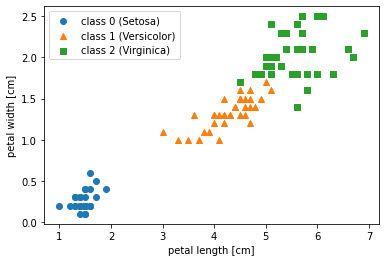

In [30]:
plt.scatter(X_train[y_train == 0, 0],
            X_train[y_train == 0, 1],
            marker='o',
            label='class 0 (Setosa)')

plt.scatter(X_train[y_train == 1, 0],
            X_train[y_train == 1, 1],
            marker='^',
            label='class 1 (Versicolor)')

plt.scatter(X_train[y_train == 2, 0],
            X_train[y_train == 2, 1],
            marker='s',
            label='class 2 (Virginica)')

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.show()

In [33]:
y_train


array([2, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 0, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0,
       1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1,
       1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 2, 1,
       2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 2])

In [34]:
y_train == 0, 1

(array([False, False, False,  True,  True, False,  True,  True, False,
        False, False, False, False, False, False,  True, False, False,
         True,  True, False, False, False, False,  True, False, False,
        False,  True, False, False, False,  True, False, False,  True,
         True, False, False, False,  True,  True, False,  True, False,
        False,  True, False,  True,  True, False,  True,  True, False,
        False, False, False, False,  True,  True, False, False,  True,
         True, False, False, False, False, False, False, False, False,
         True,  True, False, False, False, False, False,  True, False,
         True, False, False,  True, False, False, False, False, False,
         True, False,  True, False, False, False, False, False, False,
        False,  True, False, False, False, False]), 1)

**Q: What are your thoughts after the visual inspection of the dataset?**

## 7 - Fitting a k-Nearest Neighbor Model into the Dataset

We use the `KNeighborsClassifier` class from scikit-learn and instantiate a new KNN object, which we call `knn_model` and use to "fit" the training dataset:

In [52]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

**Q: What is the default metric and which other options do there exists?**

## 8 - Using the k-NN Model to Make Predictions

Once trained the KNN model, we can use it to make predictions on new data that has not seen before.

In [53]:
y_pred = knn_model.predict(X_test)

In [54]:
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100
print(f'Test set accuracy: {accuracy:.2f}%')

Test set accuracy: 91.11%


In [55]:
print(f'Test set accuracy: {knn_model.score(X_test, y_test)*100:.2f}%')

Test set accuracy: 91.11%


## 9 - Visualizing the kNN Decision Boundary

We can also visualize the decision boundary of the trained model:

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


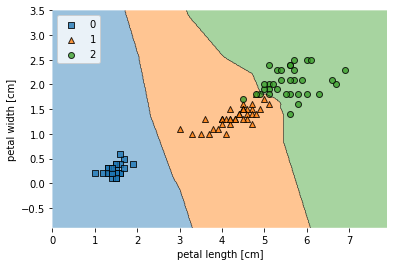

In [56]:
from mlxtend.plotting import plot_decision_regions


plot_decision_regions(X_train, y_train, knn_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


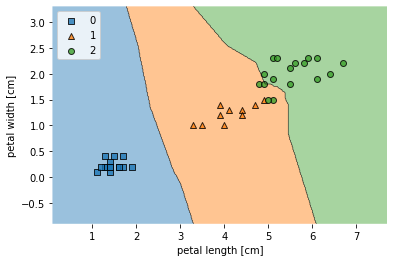

In [57]:
plot_decision_regions(X_test, y_test, knn_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()